**Working with discretized data**

Any computational work on functions of continuous variables relies first on a discretization of these functions, i.e. a choice on how to represent the functions with a finite number of variables. For a function of a single real number $f(x)$, the simplest way to do this is to choose a set of $N$ points $x_i$ ($i=0,1,2,...,N-1$) and store the values $f(x_i)$.

Let us start with a simple example. Take

$f(x) = 2\cos{(x^2)}-1$

defined over the range $x\in [-1,1]$ and 

$x_i = -1 + 2\frac{i+0.5}{N}$.

Construct numpy arrays $f_N$ containing the values $f(x_i)$ for $N=2,5,10,100,1000$, as well as numpy arrays $x_N$ containing the coordinates $x_i$ for the same values of $N$. I recommend doing this using python functions generating $x_N$ given $N$ and $f_N$ given $x_N$, rather than manually defining every $x_N$. The numpy function *arange* may also be useful for this.

In [5]:
import numpy as np 
def createarray(N):
    array = np.zeros(N)
    for x in range(0,N):
        array[x] = -1 + 2*((x+0.5)/N)
    return array
# the createarray function makes the xi = -1 + 2(i+.5/N) array


In [7]:
def fx(A):
    y = np.square(A)
    y1 = np.cos(y)
    y2 = 2*y1-1
    return y2
# The fx function creates an array of y values for f(x) given a corresponding array of x values

In [9]:
X2 = createarray(2)
Y2 = fx(X2)

X5 = createarray(5)
Y5 = fx(X5)

X10 = createarray(10)
Y10 = fx(X10)

X100 = createarray(100)
Y100 = fx(X100)

X1000 = createarray(1000)
Y1000 = fx(X1000)


Plot $f_N$ against $x_N$ for each $N$ used in the previous section. Make sure to label your axis and provide a clear legend for your plot.

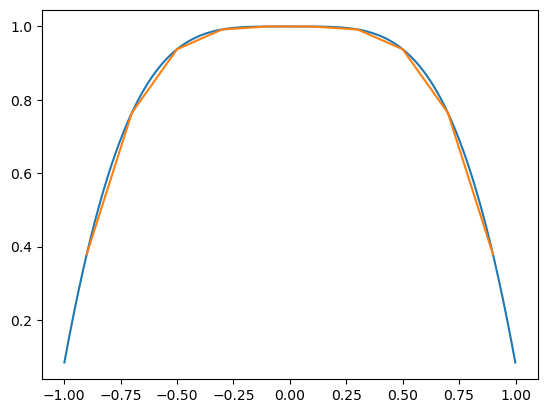

In [12]:
import matplotlib.pyplot as plt
plt.plot(X1000,Y1000)
plt.plot(X10, Y10)

**Interpolation from discretized data**

Let us now imagine that we do not know the true form of $f(x)$, and instead only have access to the discretized data. This is typically the case in real computational problems, e.g. if we evolve the values $f(x_i)$ over time without knowing a priori what $f(x,t)$ is. We would like to estimate $f(x)$ for any real input $x$.

*Method 1*

Write a function that first find the value of $i$ such that $x_i\leq x < x_{i+1}$. Do this by looping over the array $x_N$, NOT using the known analytical values of $x_N$. The function should then calculate $f(x)$ using linear interpolation between $f(x_i)$ and $f(x_{i+1})$.

*Method 2*

Write a function performing the same operation, but using the premade function *interpolate.interp1d* from scipy, and cubic interpolation (see Maurik Holtrop's notebook on Basic Calculus for a discussion of that function).

Once you have implemented both functions, use them to estimate $f(\pi/4)$ with both Method 1 and Method 2 and for all values of $N$, and compare to the true answer for the original function $f(x)$. Why is this not working for $N=2$?

In [15]:
def myinterp(X, Y, Xval):
        for i in X:
          if X(i) >= Xval:
            I1 = i - 1
            I2 = i
            break
        Yval = Y(I1) + ((Xval - X(I1))/(X(I2) - X(I1)))*(Y(I2)-Y(I1))
        return Yval

#This won't work for pi/4 because pi/4 is around .75 which is outside the interval -0.5 to .5 which we get for N = 2

    

    

In [38]:
def myinterp2(X, Y, Xval):
    f1 = sp.interpolate.interp1d(X,Y,kind = "cubic")
    Yval = f1(Xval)
    return Yval

myinterp2(X100,Y100,0.75)

    

array(0.691849)

**Inverse of a function**

Assume that you are given $x_N$ and $f_N$ for $N=100$, as calculated above. Used the *interpolate.interp1d* function and your plots of $f(x)$ to estimate the value(s) of $x$ for which $f(x)=0.32$ (see the Basic Calculus notebook for a discussion of how to do this).

In [28]:
import scipy as sp
#what does interp1d actually take in as inputs and produce as an output?
def personalinterp(X,Y):
    X1 = X[:50]
    X2 = X[50:]
    Y1 = Y[:50]
    Y2 = Y[50:]
    f1 = sp.interpolate.interp1d(Y1,X1)
    f2 = sp.interpolate.interp1d(Y2,X2)
    return f1(0.32)

personalinterp(X100,Y100)

array(-0.9218116)

**Derivative of a discretized function**

We would now like to estimate $f'=df/dx$. This is a fairly common necessity when solving physics problems computationally, e.g. when evolving ODEs/PDEs.
A simple approximation to $f'(x_i)$ is

$f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$

Write a function that returns numpy array $f'_N$, given the arrays $f_N$ and $x_N$ from the previous problems. What is a reasonable thing to do to deal with the end points $i=0$ and $i=N-1$?

Plot your results for $f'_N$ for all values of $N$ used so far, and compare with the exact result for $f'(x)$.

In [21]:
#When you do numerical differentiation, you usually just have to drop the endpoints, since the derivative
#isn't well defined there.
def myderive(X,Y):
    h = X[2] - X[1]
    Y = np.array(Y)
    Y1 = Y[:-1]
    Y2 = Y[1:]
    df = (Y2-Y1)/h
    return df
myderive(X100,Y100)

array([ 3.21214897e+00,  3.05887265e+00,  2.90665115e+00,  2.75603887e+00,
        2.60754122e+00,  2.46161581e+00,  2.31867388e+00,  2.17908194e+00,
        2.04316341e+00,  1.91120053e+00,  1.78343618e+00,  1.66007589e+00,
        1.54128985e+00,  1.42721488e+00,  1.31795648e+00,  1.21359082e+00,
        1.11416673e+00,  1.01970764e+00,  9.30213474e-01,  8.45662475e-01,
        7.66012983e-01,  6.91205140e-01,  6.21162508e-01,  5.55793621e-01,
        4.94993449e-01,  4.38644773e-01,  3.86619487e-01,  3.38779804e-01,
        2.94979383e-01,  2.55064365e-01,  2.18874334e-01,  1.86243193e-01,
        1.56999960e-01,  1.30969490e-01,  1.07973125e-01,  8.78292713e-02,
        7.03539119e-02,  5.53610565e-02,  4.26631320e-02,  3.20713177e-02,
        2.33958303e-02,  1.64461614e-02,  1.10312720e-02,  6.95974943e-03,
        4.03992862e-03,  2.07998447e-03,  8.87997761e-04,  2.71999840e-04,
        3.99999973e-05,  0.00000000e+00, -3.99999973e-05, -2.71999840e-04,
       -8.87997761e-04, -

**Integral of a discretized function**

Now, let us estimate

$I = \int_0^1 dx f(x)$

As for interpolation, you will first use your own implementation of an integration routine, then use python's built-in functions.

*Method 1*

Write a function that takes as input the numpy arrays $x_N$ and $f_N$, and returns $I$ calculated using the trapezoidal rule. For this part, you are only allowed to use loops and algebraic functions, not any of python's built-in functions. What is a reasonable thing to do to deal with the end points?

*Method 2*

Now, write a function performing the same calculation using the built-in *integrate.cumtrapz* from scipy.

In [75]:
def myint(X,Y):
    h = X[2] - X[1]
    Y1 = np.array(Y)
    Y1 = Y1[:-1]
    Y1 = Y1[1:]
    Ival = np.sum(Y1)
    I = Ival*h + Y[-1]*h + Y[0]*h
    return I
    
myint(X10,Y10)
    

1.6293171573609377

In [77]:
def myint(X,Y):
    h = X[1]-X[0]
    I = sp.integrate.cumtrapz(Y,X)
    return I[-1]

myint(X10,Y10)

C:\Users\cswoo\AppData\Local\Temp\ipykernel_21264\3486994991.py:3: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  I = sp.integrate.cumtrapz(Y,X)


1.5535177841802392